In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [645]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv', nrows = 6868)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


In [646]:
internet_df = pd.read_csv('../data/internet_use.csv.csv', nrows= 4495)

In [647]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


#7 Look at the shape of each DataFrame - how many rows? How many columns?

gdp_df has 6870 rows and 4 columns internet_df has 4675 rows and 4 columns

In [648]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   int64  
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 214.8+ KB


In [649]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


#8 Take a look at the datatypes for the columns in each DataFrame.

In [650]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [651]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

#9 Take a look at the last 10 rows of each DataFrame in turn.

In [652]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [653]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#10 Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [654]:
del gdp_df['Value Footnotes']
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [655]:
del internet_df['Value Footnotes']
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


#11 Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [656]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year', 
                         'Value' : 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


#12 Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [657]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year',
                            'Value' : 'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


#13 Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [658]:

gdp_and_internet_use = gdp_df.merge(internet_df, how='outer', 
                                    on=['Country','Year'])


#14 Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [659]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


#15 Look at the last five rows to make sure the data is clean and as expected.

In [660]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


#16 Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [661]:
gdp_and_internet_use = gdp_and_internet_use.loc[(gdp_and_internet_use['Year'] == 2004)
                                               | (gdp_and_internet_use['Year']== 2009)
                                               | (gdp_and_internet_use['Year']== 2014)]
                                           

In [662]:
gdp_and_internet_use.head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
33,Albania,2004,7604.838002,2.420388
53,Algeria,2014,11512.705405,18.090000
58,Algeria,2009,10782.361398,11.230000
63,Algeria,2004,10058.435939,4.634475
83,Angola,2014,8239.828837,21.260000


#17 Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [663]:
data = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2004]

year2004 = pd.DataFrame(data)

year2004.head(5)





,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2004,1200.278256,0.105809
33,Albania,2004,7604.838002,2.420388
63,Algeria,2004,10058.435939,4.634475
93,Angola,2004,5593.241537,0.464815
123,Antigua and Barbuda,2004,18745.681534,24.266544


In [664]:
data2 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2009]
year2009 = pd.DataFrame(data2)

In [665]:
year2009.head()
print(type(year2009))

<class 'pandas.core.frame.DataFrame'>


In [666]:
data3 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]
year2014 = pd.DataFrame(data3)

In [667]:
year2014.head()
print(type(year2014))

<class 'pandas.core.frame.DataFrame'>


#18 Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [668]:
year2014.columns = year2014.columns.str.strip() 


In [669]:
year2014.loc[year2014['Internet_Users_Pct'].idxmax()]

Country               Iceland
Year                     2014
GDP_Per_Capita        49652.1
Internet_Users_Pct      98.16
Name: 2625, dtype: object

#19 Which country had the lowest percentage of internet users in 2014? What was the percentage?



In [670]:
year2014.loc[year2014['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 7079, dtype: object

#20 Repeat for 2004 and 2009

In [671]:
year2004.loc[year2004['Internet_Users_Pct'].idxmax()]

Country               Sweden
Year                    2004
GDP_Per_Capita         44496
Internet_Users_Pct     83.89
Name: 6019, dtype: object

In [672]:
year2004.loc[year2004['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 7088, dtype: object

In [673]:
year2009.loc[year2009['Internet_Users_Pct'].idxmax()]

Country               Iceland
Year                     2009
GDP_Per_Capita        48177.1
Internet_Users_Pct         93
Name: 2630, dtype: object

In [674]:
year2009.loc[year2009['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 7083, dtype: object

#21 Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [675]:
year2014.loc[year2014['GDP_Per_Capita'].idxmax()]

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita                  156514
Internet_Users_Pct                 NaN
Name: 3721, dtype: object

#22 Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [676]:
year2014.loc[year2014['GDP_Per_Capita'].idxmin()]

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                          822.61
Internet_Users_Pct                         NaN
Name: 1047, dtype: object

#23 Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

<function matplotlib.pyplot.show(close=None, block=None)>

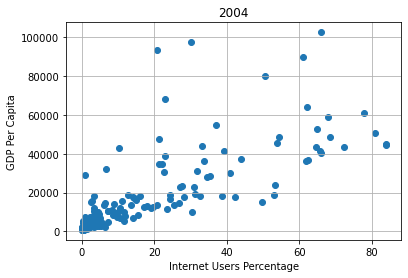

In [677]:
plt.scatter(year2004.Internet_Users_Pct, year2004.GDP_Per_Capita)
plt.xlabel('Internet Users Percentage')
plt.ylabel('GDP Per Capita')
plt.grid(True)
plt.title('2004')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

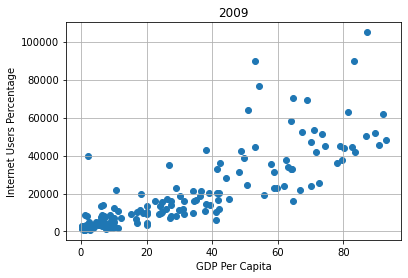

In [678]:
plt.scatter(year2009.Internet_Users_Pct, year2009.GDP_Per_Capita)
plt.ylabel('Internet Users Percentage')
plt.xlabel('GDP Per Capita')
plt.grid(True)
plt.title('2009')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

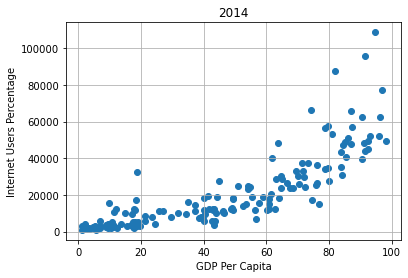

In [679]:
plt.scatter(year2014.Internet_Users_Pct, year2014.GDP_Per_Capita)
plt.ylabel('Internet Users Percentage')
plt.xlabel('GDP Per Capita')
plt.grid(True)
plt.title('2014')
plt.show

#24 Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

Over the years internet has become more affordable and available. In 2004 countries with a higher GDP also had a higher percentage of internet use. By 2014 those numbers had spread more evenly.

#25 Look at the distribution of gdp per capita values for 2014. Is it unimodal?


If my understanding of unimodal is correct, than no.

#26 Look at the distribution of Internet Use for 2014. Is it unimodal?

Yes, there is a clear peak.

#27 What are the top 5 countries in terms of internet use in 2014?

In [680]:
top_5_2014 = year2014.nlargest(5 , 'Internet_Users_Pct')
print(top_5_2014)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625  Iceland  2014    49652.149500               98.16
561   Bermuda  2014    77361.104881               96.80
4648   Norway  2014    62589.373548               96.30
1452  Denmark  2014    52214.537753               95.99
6871  Andorra  2014             NaN               95.90


#28 Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [681]:
top_5_internet = gdp_and_internet_use.loc[(gdp_and_internet_use['Country'] == 'Iceland') | 
                          (gdp_and_internet_use['Country'] == 'Bermuda') |
                          (gdp_and_internet_use['Country'] == 'Norway')  |
                          (gdp_and_internet_use['Country'] == 'Denmark') |
                          (gdp_and_internet_use['Country'] == 'Andorra')]

In [696]:
type(top_5_internet)

pandas.core.frame.DataFrame

In [683]:
len(top_5_internet.index)

15

#29 Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

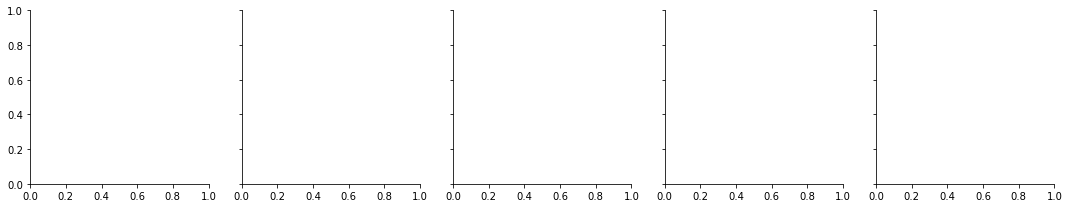

In [692]:
facet_grid = sns.FacetGrid(top_5_internet, col = 'Country')
plt.show()

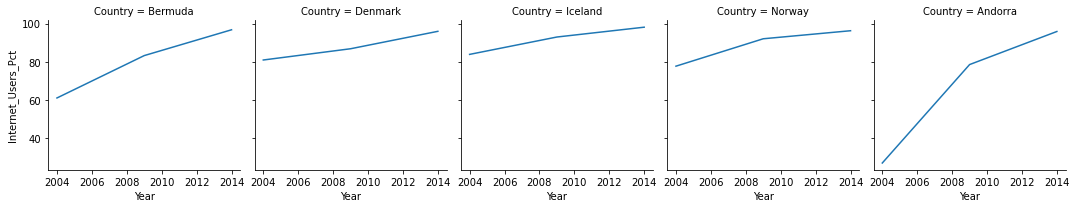

In [693]:
facet_grid.map(sns.lineplot, 'Year',  'Internet_Users_Pct', 'Country')

Andorra had the largest growth. 

#30 Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [694]:
bottom_5_2014 = year2014.nsmallest(5 , 'Internet_Users_Pct')
print(bottom_5_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7079  Dem. People's Rep. of Korea  2014             NaN                0.00
7137                      Eritrea  2014             NaN                0.99
6219                  Timor-Leste  2014     3264.568070                1.14
827                       Burundi  2014      886.235777                1.38
7674                      Somalia  2014             NaN                1.63


In [695]:
bottom_5_internet = gdp_and_internet_use.loc[(gdp_and_internet_use['Country'] == "Dem. People's Rep. of Korea") | 
                          (gdp_and_internet_use['Country'] == 'Eritrea') |
                          (gdp_and_internet_use['Country'] == 'Timor-Leste')  |
                          (gdp_and_internet_use['Country'] == 'Burundi') |
                          (gdp_and_internet_use['Country'] == 'Somalia')]

In [698]:
type(bottom_5_internet)

pandas.core.frame.DataFrame

In [700]:
len(bottom_5_internet.index)

14

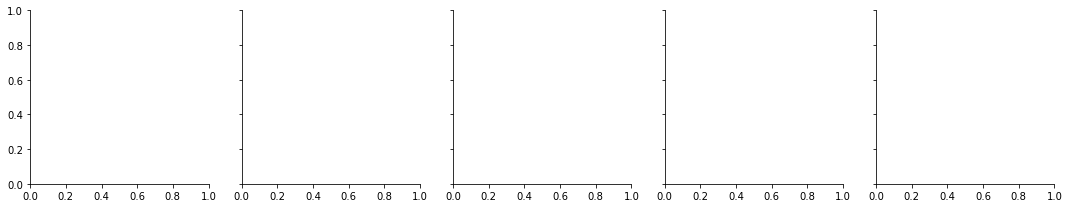

In [705]:
facet_grid = sns.FacetGrid(bottom_5_internet, col = 'Country')
plt.show()

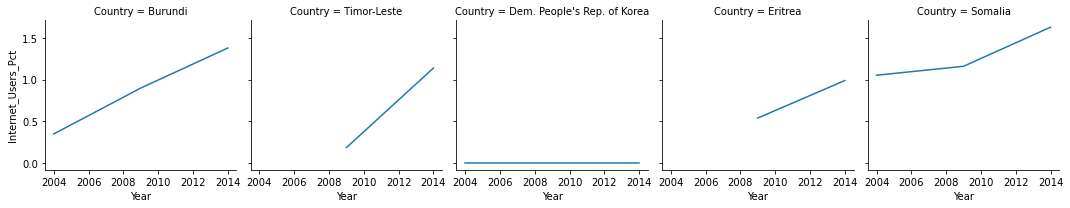

In [706]:
facet_grid.map(sns.lineplot, 'Year',  'Internet_Users_Pct', 'Country')

Democratic Peopl's Republic of Korea has consistantly been the worst. 

#31 Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.



In [709]:
top_5_gdp_2014 = year2014.nlargest(5, 'GDP_Per_Capita')

In [710]:
print(top_5_gdp_2014)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014   156514.133850                 NaN
3691        Luxembourg  2014   108760.916030               94.67
5138             Qatar  2014    95578.416973               91.49
5464         Singapore  2014    87808.663157               82.00
561            Bermuda  2014    77361.104881               96.80


In [716]:
ten_year_top = gdp_and_internet_use.loc[(gdp_and_internet_use['Country'] == "Macao Sar, China") | 
                          (gdp_and_internet_use['Country'] == 'Luxembourg') |
                          (gdp_and_internet_use['Country'] == 'Qatar')  |
                          (gdp_and_internet_use['Country'] == 'Singapore') |
                          (gdp_and_internet_use['Country'] == 'Bermuda')]

In [717]:
type(ten_year_top)

pandas.core.frame.DataFrame

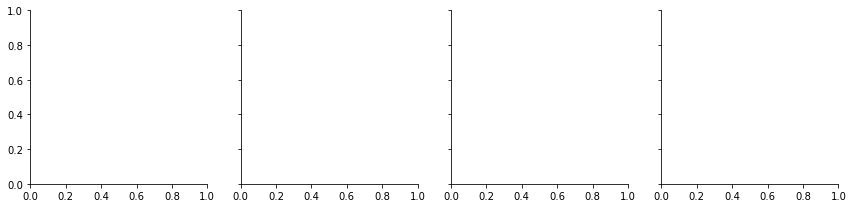

In [718]:
top_gdp_facet = sns.FacetGrid(ten_year_top, col = 'Country')
plt.show()

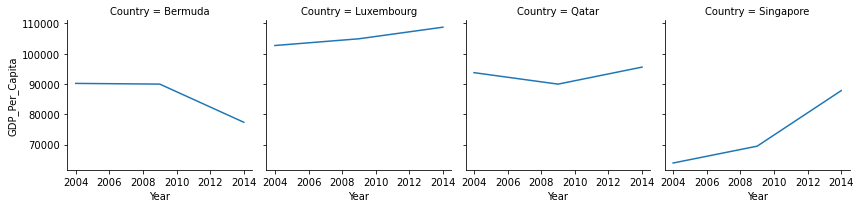

In [720]:
top_gdp_facet.map(sns.lineplot, 'Year',  'GDP_Per_Capita', 'Country')

#32 Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [721]:
bottom_5_gdp_2014 = year2014.nsmallest(5, 'GDP_Per_Capita')

In [722]:
print(bottom_5_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7079  Dem. People's Rep. of Korea  2014             NaN                0.00
7137                      Eritrea  2014             NaN                0.99
6219                  Timor-Leste  2014     3264.568070                1.14
827                       Burundi  2014      886.235777                1.38
7674                      Somalia  2014             NaN                1.63


In [727]:
ten_year_bottom = gdp_and_internet_use.loc[(gdp_and_internet_use['Country'] == "Dem. People's Rep. of Korea") | 
                          (gdp_and_internet_use['Country'] == 'Eritrea') |
                          (gdp_and_internet_use['Country'] == 'Timor-Leste')  |
                          (gdp_and_internet_use['Country'] == 'Burundi') |
                          (gdp_and_internet_use['Country'] == 'Somalia')]

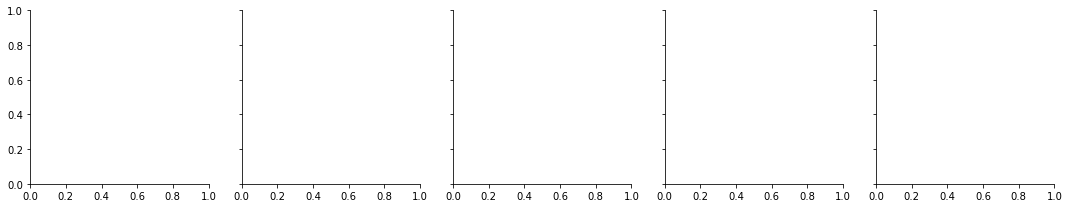

In [728]:
bottom_ten_facet = sns.FacetGrid(ten_year_bottom, col = 'Country')
plt.show()

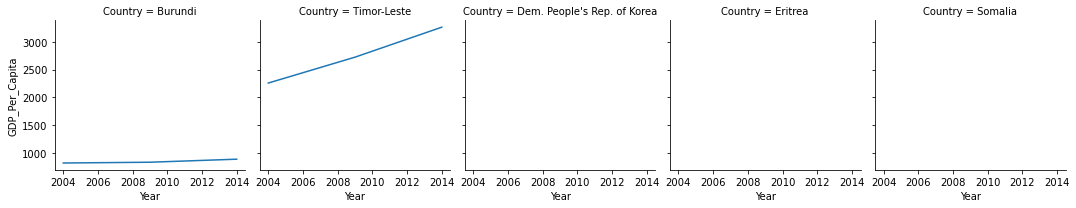

In [729]:
bottom_ten_facet.map(sns.lineplot, 'Year',  'GDP_Per_Capita', 'Country')

#33 Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?